<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = 'p6Fg6WjZeOIQN1FvrsnvCfcbo'
consumer_key_secret = '7sgTYd66QCOoaEDuOXSoH5TkoTJrzmWvjEDnVdIaO7tqZgeGhg'
access_token = '132425188-3pEgCTglpzvYC605OMINgGkn3fO5pTFMv2NfWY61'
access_token_secret = 'Qkzccwwbf6J4Mrpkem4LHVefHxBT13E3C28x0F8gufIyc'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#Defining Search keyword and number of tweets and searching tweets
query = 'COVID-19'
max_tweets = 2000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [6]:
#Part-2: Sentiment Analysis Report

#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  351
Total Negative =  172
Total Neutral =  1477


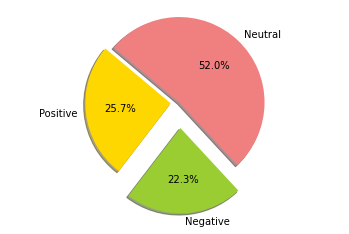

In [11]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [257, 223, 520]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.3, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [12]:


#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data.csv')



In [13]:
tweet_dataset

,tweet_id,text,favorite_count,retweet_count,created_at
0,1346306744398405633,RT @mamamapounds: มีคนช่วยแนะนำ Away covid-19 ...,0,14817,Tue Jan 05 04:05:15 +0000 2021
1,1346306744058748933,RT @Andiarief__: Mohon doa netizen untuk kesem...,0,15,Tue Jan 05 04:05:15 +0000 2021
2,1346306743677067264,RT @fluke_marut: ทีมวิจัย ม.สงขลานครินทร์โคตรเ...,0,136,Tue Jan 05 04:05:15 +0000 2021
3,1346306743677063174,RT @BrianGDK_: Pedro and Michy Batshuayi while...,0,5,Tue Jan 05 04:05:15 +0000 2021
4,1346306743492603904,RT @NicholasIovino: .@ICEgov will not contest ...,0,17,Tue Jan 05 04:05:15 +0000 2021
...,...,...,...,...,...
1995,1346306016078688258,RT @EdoCote: La Merkel de Alemania está al fre...,0,78,Tue Jan 05 04:02:22 +0000 2021
1996,1346306015772307456,RT @mamamapounds: มีคนช่วยแนะนำ Away covid-19 ...,0,14900,Tue Jan 05 04:02:21 +0000 2021
1997,1346306014186881025,RT @mamamapounds: มีคนช่วยแนะนำ Away covid-19 ...,0,14900,Tue Jan 05 04:02:21 +0000 2021
1998,1346306014166048770,RT @Mippcivzla: #NotiMippCI 📰🗞| Venezuela lame...,0,1088,Tue Jan 05 04:02:21 +0000 2021


In [14]:
tweet_dataset.shape

(2000, 5)

In [15]:
#part 4 - Cleaning Data

#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [16]:
tweet_dataset

,tweet_id,text,favorite_count,retweet_count,created_at
0,1346306744398405633,RT : มีคนช่วยแนะนำ Away covid-19 เยอะเลย น้ามต...,0,14817,Tue Jan 05 04:05:15 +0000 2021
1,1346306744058748933,RT : Mohon doa netizen untuk kesembuhan rekan ...,0,15,Tue Jan 05 04:05:15 +0000 2021
2,1346306743677067264,RT : ทีมวิจัย ม.สงขลานครินทร์โคตรเก่งอ่ะ ผลิตเ...,0,136,Tue Jan 05 04:05:15 +0000 2021
3,1346306743677063174,RT : Pedro and Michy Batshuayi while he was al...,0,5,Tue Jan 05 04:05:15 +0000 2021
4,1346306743492603904,RT : . will not contest a preliminary injuncti...,0,17,Tue Jan 05 04:05:15 +0000 2021
...,...,...,...,...,...
1995,1346306016078688258,RT : La Merkel de Alemania está al frente del ...,0,78,Tue Jan 05 04:02:22 +0000 2021
1996,1346306015772307456,RT : มีคนช่วยแนะนำ Away covid-19 เยอะเลย น้ามต...,0,14900,Tue Jan 05 04:02:21 +0000 2021
1997,1346306014186881025,RT : มีคนช่วยแนะนำ Away covid-19 เยอะเลย น้ามต...,0,14900,Tue Jan 05 04:02:21 +0000 2021
1998,1346306014166048770,RT : #NotiMippCI 📰🗞| Venezuela lamenta desaten...,0,1088,Tue Jan 05 04:02:21 +0000 2021


In [17]:
#Cleaning Tweets
corpus = []
for i in range(0, 1000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

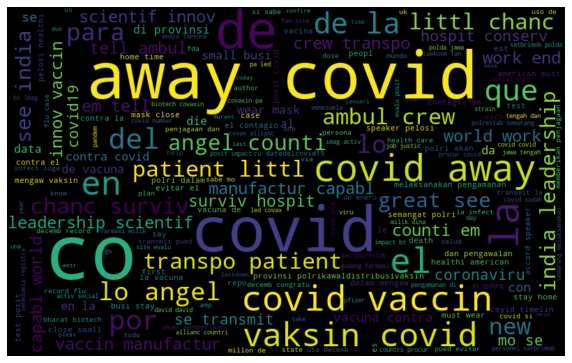

In [18]:
#Part-5: Visualization

#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)

[('away covid 19', 213), ('great see india leadership scientif innov vaccin manufactur capabl world work end', 21), ('lo angel counti em tell ambul crew transpo patient littl chanc surviv hospit conserv', 21), ('away covid 19 timelin', 12), ('accord speaker pelosi healthi american must wear mask close small busi stay home time', 11), ('c mo se transmit la covid 19 si sabe c mo se transmit pued evitar el contagio de la infect loga', 10), ('decemb 28 2019 7 000 record flu case usa decemb 28 2020 36 congratu', 9), ('media taekook fan site evalu posit impact bt imag activ social cont', 8), ('today decid join histori make got covid 19 vaccin', 7), ('vaksin covid 19 sudah datang semoga bermanfaat bagi seluruh rakyat indonesia polrikawaldistribusivaksin', 7)]
